In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

In [2]:
spark = SparkSession.builder \
                    .appName("Data Cleaning and Transformation Pipeline") \
                    .master("local[*]") \
                    .getOrCreate()

In [3]:
spark

In [4]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

### Reading Data

In [5]:
def read_data(spark, file_path):
    heart_dataframe =  spark.read \
                            .format('csv') \
                            .option('inferSchema', 'true') \
                            .option('header', 'true') \
                            .load(file_path)
    print("Data read successfully.")
    return heart_dataframe

### Show Dataframe, schema, first 5 rows

In [6]:
def show_dataframe_and_relevant_details(dataframe):
    print(dataframe, "\n")
    dataframe.printSchema()
    print("\nCount of records in dataframe:", dataframe.count())
    print("\nFirst 5 records:")
    dataframe.show(5)

### Drop Null values.

In [7]:
def drop_nulls(dataframe):
    heart_dataframe = dataframe.dropna()
    print("Null values dropped successfully.")
    return heart_dataframe

### Encoding using StringIndexer and One Hot Encoding.

#### String Indexer
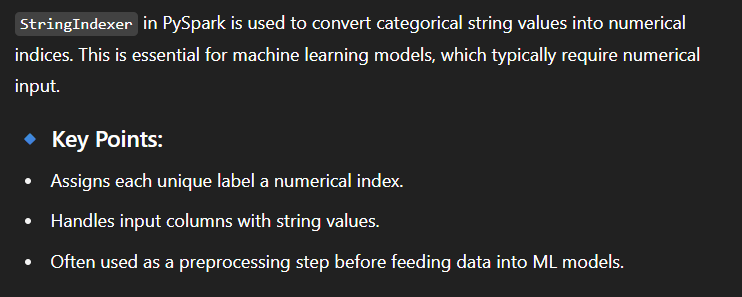
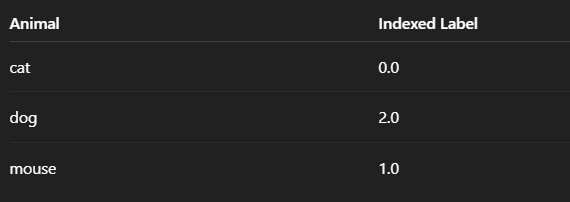
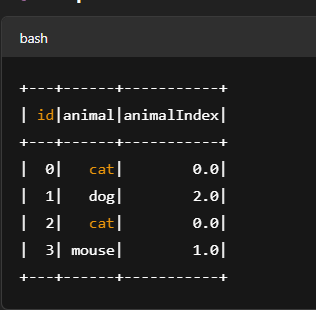

#### One Hot Encoding
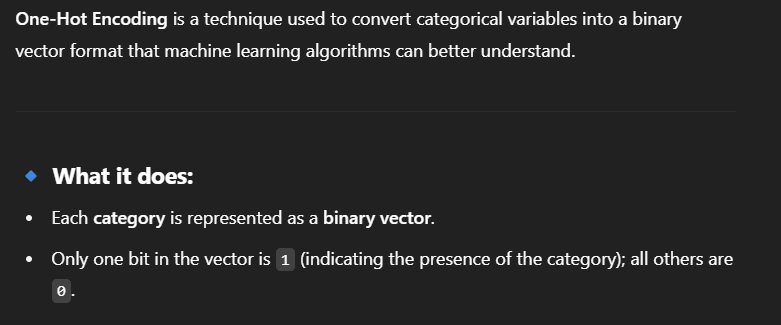
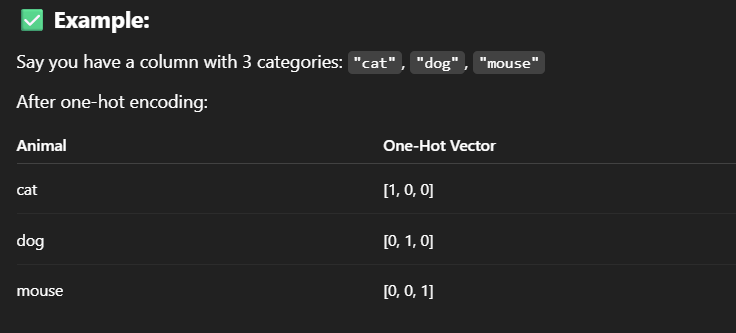
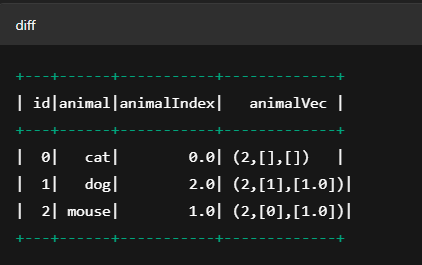

#### Why use One Hot Encoding AFTER String Indexer
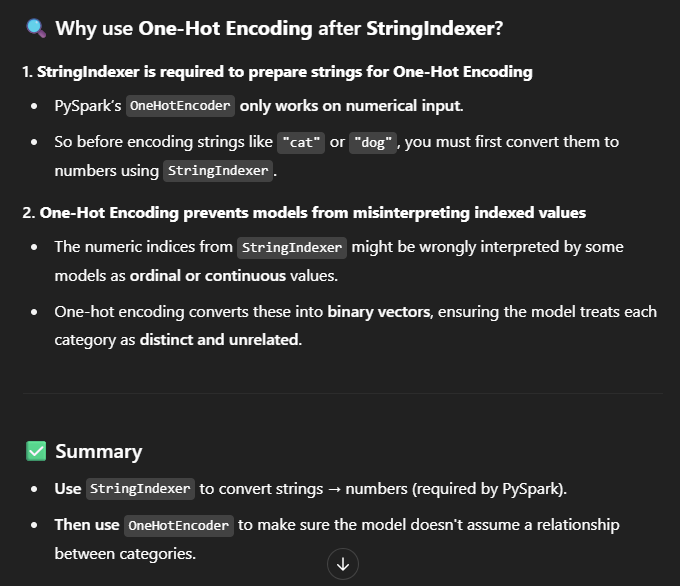

In [8]:
def encode_categorical_features(dataframe):
    indexers = [
        StringIndexer(inputCol=col_name, outputCol=f'{col_name}_indexed', handleInvalid='keep')
        for col_name in categorical_features
    ]
    encoders = [
        OneHotEncoder(inputCol=f'{col_name}_indexed', outputCol=f'{col_name}_encoded')
        for col_name in categorical_features
    ]

    pipeline = Pipeline(stages = indexers + encoders)
    model = pipeline.fit(dataframe)

    heart_dataframe = model.transform(dataframe)
    print("Encoding successful.")

    return heart_dataframe

In [9]:
def cast_remaining_to_float(dataframe):
    float_columns = ["age", "trestbps", "chol", "thalach", "oldpeak"]
    for column in float_columns:
        df_encoded = dataframe.withColumn(column, dataframe[column].cast('float'))
    print("Cast to float successful.")
    
    return df_encoded

In [10]:
def obtain_cleaned_dataset(spark, file_path):
    heart_dataframe = read_data(spark, file_path)
    show_dataframe_and_relevant_details(heart_dataframe)
    heart_dataframe = drop_nulls(heart_dataframe)
    heart_dataframe = encode_categorical_features(heart_dataframe)
    heart_dataframe = cast_remaining_to_float(heart_dataframe)
    columns_to_drop = categorical_features + [f'{column}_indexed' for column in categorical_features]
    
    heart_dataframe = heart_dataframe.drop(*columns_to_drop)
    print('Cleaned Dataframe obtained.')
    return heart_dataframe

In [11]:
heart_dataframe = obtain_cleaned_dataset(spark, 'Heart Disease UCI.csv')

Data read successfully.
DataFrame[age: int, sex: int, cp: int, trestbps: int, chol: int, fbs: int, restecg: int, thalach: int, exang: int, oldpeak: double, slope: int, ca: int, thal: int, condition: int] 

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slope: integer (nullable = true)
 |-- ca: integer (nullable = true)
 |-- thal: integer (nullable = true)
 |-- condition: integer (nullable = true)


Count of records in dataframe: 297

First 5 records:
+---+---+---+--------+----+---+-------+-------+-----+-------+-----+---+----+---------+
|age|sex| cp|trestbps|chol|fbs|restecg|thalach|exang|oldpeak|slope| ca|thal|condition|
+---+---+---+--------+----+---